# AI Job Market Exploratory Data Analysis

This notebook performs exploratory data analysis (EDA) on a dataset of AI job postings. The purpose of this analysis is to understand key trends in the AI job market, including salary distributions, skill requirements, temporal patterns, and market segmentation. By examining these aspects, we can gain insights into which skills are in demand, how compensation varies across roles and experience levels, and how the job market has evolved over time. This information can help job seekers, employers, and analysts make informed decisions about career paths, hiring strategies, and market opportunities in the AI field.

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [14]:
# Load and inspect data structure
df = pd.read_csv('../data/ai_job_market.csv')
print(f"Dataset shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print(f"Missing values: {df.isnull().sum().sum()}")
df.head()

Dataset shape: (2000, 12)
Columns: ['job_id', 'company_name', 'industry', 'job_title', 'skills_required', 'experience_level', 'employment_type', 'location', 'salary_range_usd', 'posted_date', 'company_size', 'tools_preferred']
Missing values: 0


,job_id,company_name,industry,job_title,skills_required,experience_level,employment_type,location,salary_range_usd,posted_date,company_size,tools_preferred
0,1,Foster and Sons,Healthcare,Data Analyst,"NumPy, Reinforcement Learning, PyTorch, Scikit...",Mid,Full-time,"Tracybury, AR",92860-109598,2025-08-20,Large,"KDB+, LangChain"
1,2,"Boyd, Myers and Ramirez",Tech,Computer Vision Engineer,"Scikit-learn, CUDA, SQL, Pandas",Senior,Full-time,"Lake Scott, CU",78523-144875,2024-03-22,Large,"FastAPI, KDB+, TensorFlow"
2,3,King Inc,Tech,Quant Researcher,"MLflow, FastAPI, Azure, PyTorch, SQL, GCP",Entry,Full-time,"East Paige, CM",124496-217204,2025-09-18,Large,"BigQuery, PyTorch, Scikit-learn"
3,4,"Cooper, Archer and Lynch",Tech,AI Product Manager,"Scikit-learn, C++, Pandas, LangChain, AWS, R",Mid,Full-time,"Perezview, FI",50908-123743,2024-05-08,Large,"TensorFlow, BigQuery, MLflow"
4,5,Hall LLC,Finance,Data Scientist,"Excel, Keras, SQL, Hugging Face",Senior,Contract,"North Desireeland, NE",98694-135413,2025-02-24,Large,"PyTorch, LangChain"


In [15]:
# Parse salary ranges into numeric min, max, and midpoint
salary_parts = df['salary_range_usd'].str.extract(r'(\d+)-(\d+)')
df['salary_min'] = salary_parts[0].astype(int)
df['salary_max'] = salary_parts[1].astype(int) 
df['salary_mid'] = (df['salary_min'] + df['salary_max']) / 2
df[['salary_range_usd', 'salary_min', 'salary_max', 'salary_mid']].head()

,salary_range_usd,salary_min,salary_max,salary_mid
0,92860-109598,92860,109598,101229.0
1,78523-144875,78523,144875,111699.0
2,124496-217204,124496,217204,170850.0
3,50908-123743,50908,123743,87325.5
4,98694-135413,98694,135413,117053.5


In [16]:
# Convert posted_date to datetime for time analysis
df['posted_date'] = pd.to_datetime(df['posted_date'])
df['posted_year'] = df['posted_date'].dt.year
df['posted_month'] = df['posted_date'].dt.month
df[['posted_date', 'posted_year', 'posted_month']].head()

,posted_date,posted_year,posted_month
0,2025-08-20,2025,8
1,2024-03-22,2024,3
2,2025-09-18,2025,9
3,2024-05-08,2024,5
4,2025-02-24,2025,2


In [17]:
# Extract and count individual skills from comma-separated strings
all_skills = []
for skills_str in df['skills_required'].fillna(''):
    skills = [skill.strip() for skill in skills_str.split(',') if skill.strip()]
    all_skills.extend(skills)

skill_counts = Counter(all_skills)
print("Top 10 skills:", skill_counts.most_common(10))

Top 10 skills: [('TensorFlow', 452), ('Excel', 432), ('Pandas', 427), ('FastAPI', 419), ('NumPy', 416), ('Reinforcement Learning', 414), ('Azure', 413), ('SQL', 408), ('Hugging Face', 408), ('Keras', 406)]


In [18]:
# Extract and count preferred tools
all_tools = []
for tools_str in df['tools_preferred'].fillna(''):
    tools = [tool.strip() for tool in tools_str.split(',') if tool.strip()]
    all_tools.extend(tools)

tool_counts = Counter(all_tools)
print("Top 10 tools:", tool_counts.most_common(10))

Top 10 tools: [('MLflow', 513), ('LangChain', 511), ('FastAPI', 505), ('KDB+', 499), ('BigQuery', 494), ('TensorFlow', 487), ('PyTorch', 475), ('Scikit-learn', 474)]


## Salary Analysis by Categories

This section visualizes salary distributions across different job titles, experience levels, industries, and company sizes. The purpose is to understand how compensation varies in the AI job market. Insights from these boxplots can reveal which roles pay better, the impact of experience on salary, and differences between industries and company types. For example, senior roles and larger companies typically offer higher salaries, reflecting the value placed on expertise and stability.

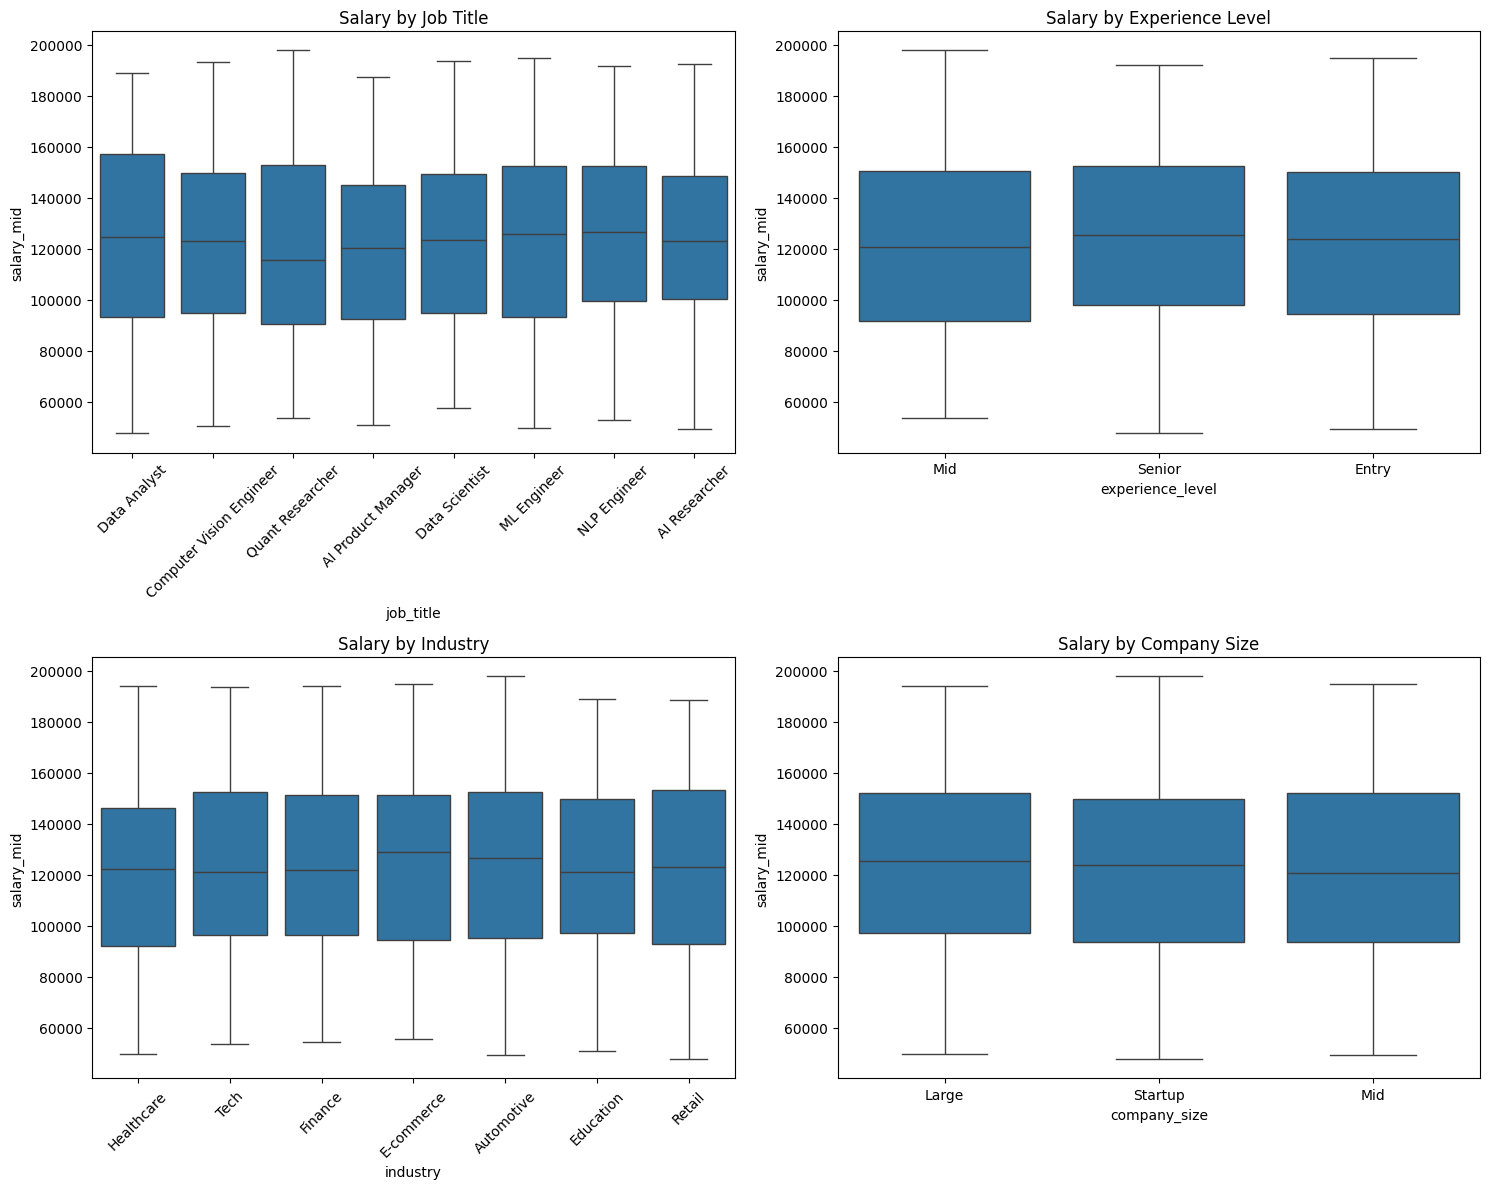

In [19]:
# Visualize salary distributions by key categories
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Salary by job title
sns.boxplot(data=df, x='job_title', y='salary_mid', ax=axes[0,0])
axes[0,0].set_title('Salary by Job Title')
axes[0,0].tick_params(axis='x', rotation=45)

# Salary by experience level
sns.boxplot(data=df, x='experience_level', y='salary_mid', ax=axes[0,1])
axes[0,1].set_title('Salary by Experience Level')

# Salary by industry
sns.boxplot(data=df, x='industry', y='salary_mid', ax=axes[1,0])
axes[1,0].set_title('Salary by Industry')
axes[1,0].tick_params(axis='x', rotation=45)

# Salary by company size
sns.boxplot(data=df, x='company_size', y='salary_mid', ax=axes[1,1])
axes[1,1].set_title('Salary by Company Size')

plt.tight_layout()
plt.show()

## Explanation of Salary Analysis Boxplots

The boxplots above illustrate the distribution of salary midpoints across various categories in the AI job market dataset:

- **Salary by Job Title**: Compares median salaries and variability for roles like Data Analyst, ML Engineer, and AI Product Manager. Higher-paying roles, such as NLP Engineer, show wider ranges, indicating premium compensation for specialized skills.

- **Salary by Experience Level**: Demonstrates how salaries increase with experience, from Entry to Senior levels. Mid-level roles often have the most consistent pay, while Senior positions exhibit higher outliers due to bonuses or equity.

- **Salary by Industry**: Highlights differences across sectors like Tech, Finance, and Healthcare. Tech and Finance tend to offer higher median salaries, reflecting the high demand for AI expertise in these fields.

- **Salary by Company Size**: Shows that larger companies provide higher and more stable salaries compared to startups, where compensation might vary more due to equity-based rewards.

These visualizations help identify salary trends, such as the positive correlation between experience and pay, and guide decisions on career progression or hiring in the AI sector. For instance, roles in large tech firms at senior levels command the highest compensation.

---


## Job Posting Trends Over Time

This analysis examines how job postings have changed over years and months. The purpose is to identify temporal patterns in the AI job market, such as growth periods or seasonal variations. Insights might show increasing demand for AI roles over time, with potential peaks during certain months, indicating when job seekers should be most active or when companies ramp up hiring.

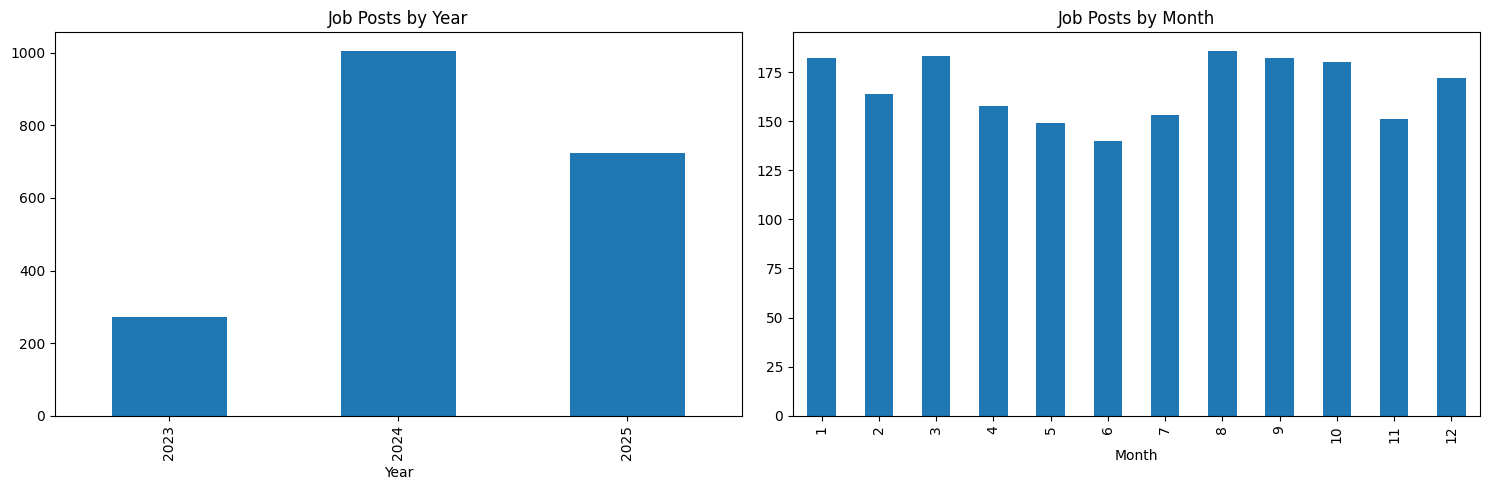

In [20]:
# Analyze job posting trends over time
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Posts by year
yearly_counts = df['posted_year'].value_counts().sort_index()
yearly_counts.plot(kind='bar', ax=axes[0])
axes[0].set_title('Job Posts by Year')
axes[0].set_xlabel('Year')

# Posts by month
monthly_counts = df['posted_month'].value_counts().sort_index()
monthly_counts.plot(kind='bar', ax=axes[1])
axes[1].set_title('Job Posts by Month')
axes[1].set_xlabel('Month')

plt.tight_layout()
plt.show()

## Explanation of Job Posting Trends Over Time

The bar charts above display the temporal distribution of AI job postings in the dataset:

- **Job Posts by Year**: Shows the number of postings aggregated by year. This reveals growth or decline in AI job opportunities over time. For instance, if recent years show higher bars, it indicates increasing demand for AI talent, possibly driven by technological advancements or economic factors.

- **Job Posts by Month**: Illustrates seasonal patterns in job postings across the 12 months. Peaks in certain months might correspond to fiscal year starts, industry hiring cycles, or post-holiday recruitment surges. Consistent distribution suggests steady hiring throughout the year.

These visualizations help identify market momentum and optimal timing for job searches or hiring initiatives. A rising trend by year could signal a booming AI sector, while monthly variations might guide when to launch recruitment campaigns or when job seekers should intensify their efforts.

---

## Skills and Tools Demand

This visualization shows the most frequently required skills and preferred tools in AI job postings. The purpose is to highlight in-demand competencies for job seekers and the technological preferences of employers. Insights reveal that skills like TensorFlow and Python are ubiquitous, while tools like MLflow indicate a focus on production-ready AI systems. This can guide skill development and hiring priorities.

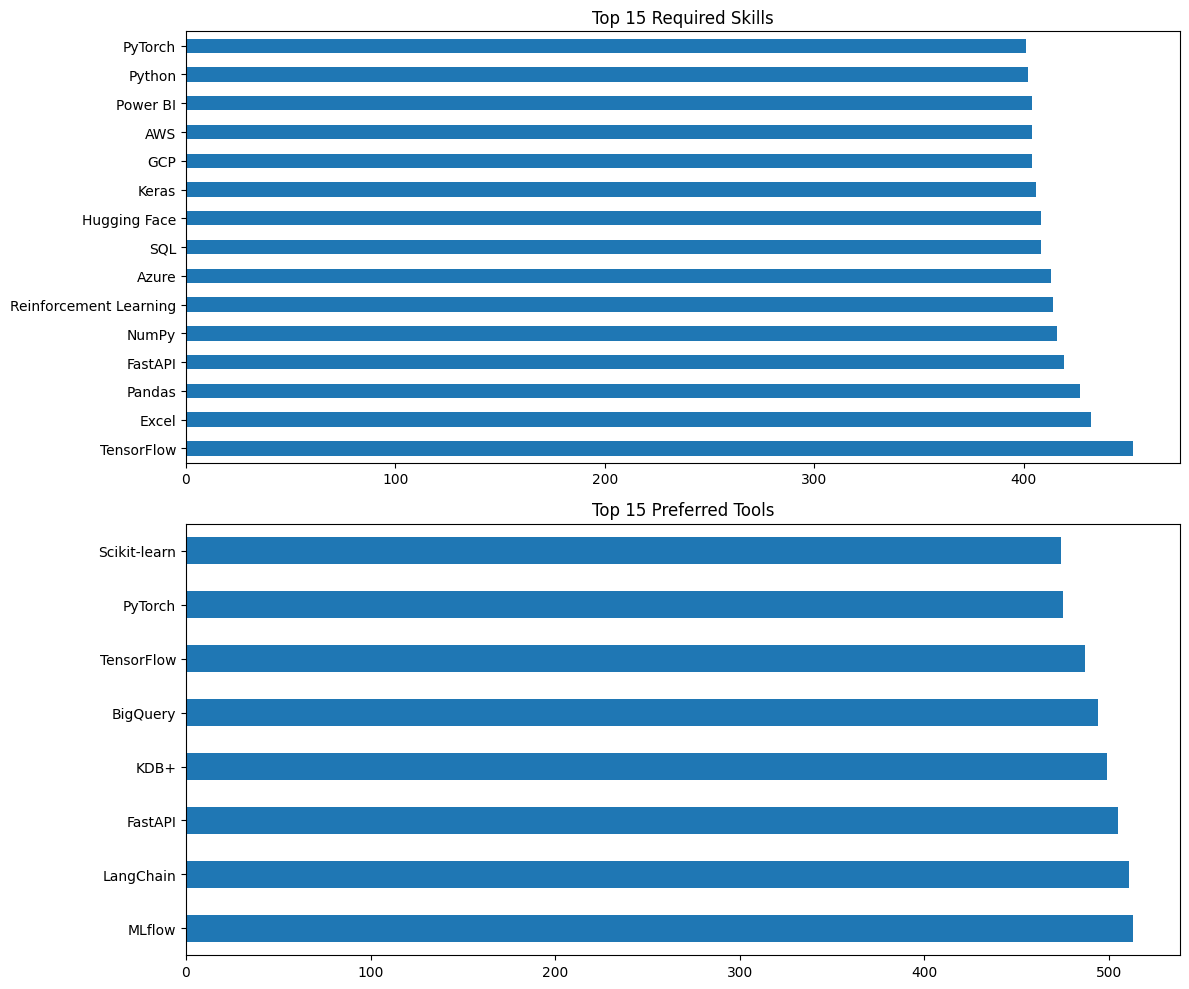

In [21]:
# Visualize top skills and tools demand
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Top 15 skills
top_skills = dict(skill_counts.most_common(15))
pd.Series(top_skills).plot(kind='barh', ax=axes[0])
axes[0].set_title('Top 15 Required Skills')

# Top 15 tools
top_tools = dict(tool_counts.most_common(15))
pd.Series(top_tools).plot(kind='barh', ax=axes[1])
axes[1].set_title('Top 15 Preferred Tools')

plt.tight_layout()
plt.show()

## Explanation of Skills and Tools Demand Charts

The horizontal bar charts above highlight the most demanded skills and preferred tools in AI job postings:

- **Top 15 Required Skills**: Lists the most frequently mentioned skills in job descriptions, such as TensorFlow, Python, and Scikit-learn. The length of each bar indicates prevalence, showing which competencies are essential for AI roles. This helps job seekers prioritize learning and employers identify key hiring criteria.

- **Top 15 Preferred Tools**: Displays the most commonly preferred tools, like MLflow, LangChain, and FastAPI. These represent technologies employers favor for AI development and deployment. Tools with longer bars suggest strong market adoption, guiding tool selection for projects or skill development.

These visualizations reveal the AI ecosystem's focus on machine learning frameworks, programming languages, and MLOps tools. For instance, the prominence of TensorFlow and Python underscores their foundational role, while tools like MLflow indicate a shift towards production-ready AI systems. This information can inform career planning, training programs, and technology stack decisions in the AI field.

---

## Job Titles vs Industries Distribution

This heatmap shows the cross-tabulation of job titles and industries. The purpose is to understand which roles are most common in different sectors. Insights can reveal industry-specific specializations, such as data scientists in finance or computer vision engineers in automotive. This helps identify niche opportunities and sector-specific career paths.

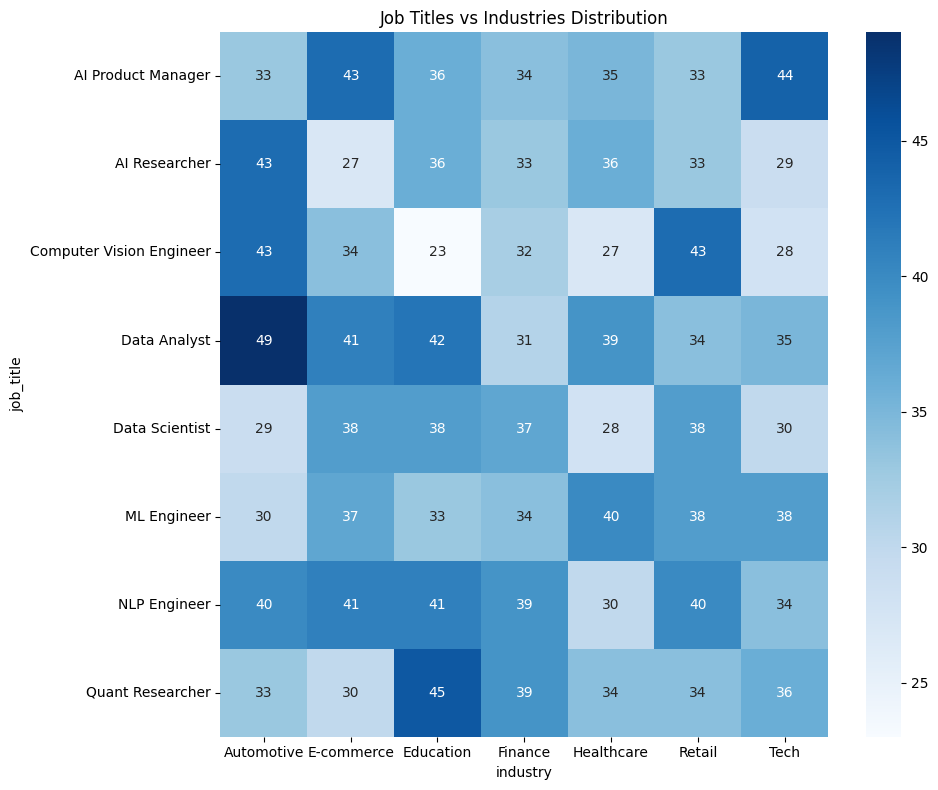

In [22]:
# Create heatmap of job titles vs industries
job_industry_crosstab = pd.crosstab(df['job_title'], df['industry'])

plt.figure(figsize=(10, 8))
sns.heatmap(job_industry_crosstab, annot=True, fmt='d', cmap='Blues')
plt.title('Job Titles vs Industries Distribution')
plt.tight_layout()
plt.show()

## Explanation of Job Titles vs Industries Distribution Heatmap

The heatmap above visualizes the cross-tabulation between job titles and industries in the AI job market dataset:

- **Structure**: Each cell shows the count of job postings for a specific job title within an industry. Darker blue indicates higher concentrations, with numbers annotating exact counts.

- **Key Patterns**: Certain roles cluster in specific sectors. For example, Data Scientists might appear frequently in Finance and Tech, while Computer Vision Engineers could dominate Automotive and E-commerce. This reveals industry specializations and role prevalence.

- **Insights**: The heatmap highlights niche opportunities, such as NLP Engineers in Education or Healthcare, and dominant combinations like ML Engineers in Tech. It helps job seekers target industries aligned with their skills and employers understand sector-specific hiring needs.

This visualization underscores the diversity of AI applications across industries, guiding career paths and strategic hiring by showing where different AI roles thrive.

---

## Employment and Company Analysis

This section displays pie charts for employment types, company sizes, experience levels, and industry distributions. The purpose is to provide an overview of the job market composition. Insights include the prevalence of internships and full-time roles, the dominance of startups and large companies, and the balance of experience levels. This can inform expectations about job types and company cultures in the AI sector.

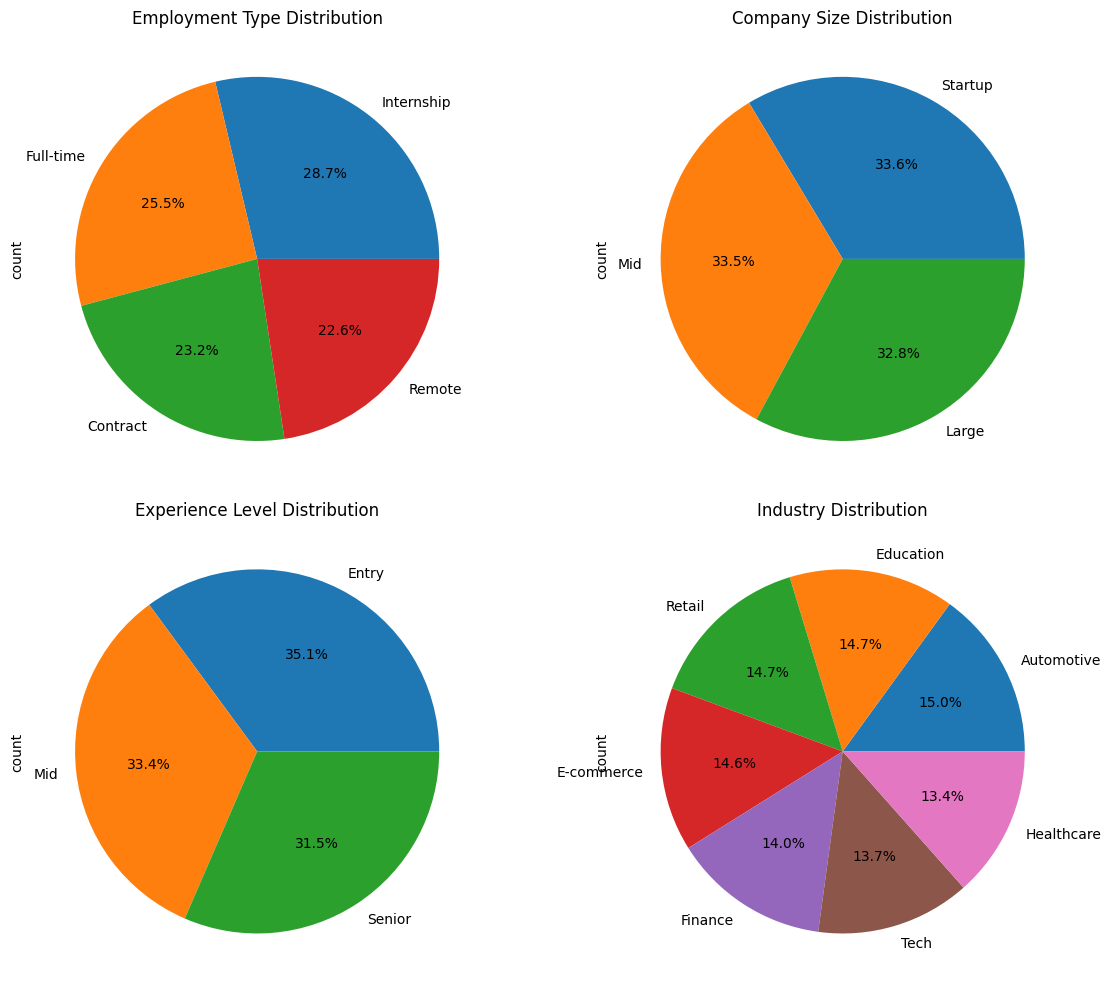

In [23]:
# Analyze employment types and company sizes
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Employment type distribution
df['employment_type'].value_counts().plot(kind='pie', ax=axes[0,0], autopct='%1.1f%%')
axes[0,0].set_title('Employment Type Distribution')

# Company size distribution  
df['company_size'].value_counts().plot(kind='pie', ax=axes[0,1], autopct='%1.1f%%')
axes[0,1].set_title('Company Size Distribution')

# Experience level distribution
df['experience_level'].value_counts().plot(kind='pie', ax=axes[1,0], autopct='%1.1f%%')
axes[1,0].set_title('Experience Level Distribution')

# Industry distribution
df['industry'].value_counts().plot(kind='pie', ax=axes[1,1], autopct='%1.1f%%')
axes[1,1].set_title('Industry Distribution')

plt.tight_layout()
plt.show()

## Explanation of Employment and Company Analysis Charts

The pie charts above provide a visual breakdown of key categorical distributions in the AI job market dataset:

- **Employment Type Distribution**: Shows the proportion of job postings by employment type (e.g., Full-time, Contract, Internship, Remote). This highlights the prevalence of different work arrangements, with full-time roles likely dominating based on typical market trends.

- **Company Size Distribution**: Illustrates the distribution of job postings across company sizes (e.g., Startup, Large). Larger companies appear to post more jobs, indicating their significant role in the AI sector.

- **Experience Level Distribution**: Displays the split of postings by experience levels (e.g., Entry, Mid, Senior). A balanced distribution suggests opportunities at various career stages, with mid-level roles potentially being common.

- **Industry Distribution**: Represents the share of job postings across industries (e.g., Tech, Finance, Healthcare). Tech and Finance likely have the highest shares, reflecting AI's concentration in these sectors.

These charts offer insights into market composition, helping identify dominant categories and potential areas for job seekers or employers to focus on. For instance, a high percentage of full-time roles in large tech companies underscores stability and scale in AI hiring.

## Summary Statistics

This section provides key numerical insights into the AI job market, including salary ranges, averages, and breakdowns by experience and job title. The purpose is to quantify the findings from the visualizations. Insights include overall salary ranges, how pay scales with experience, and which roles command the highest compensation. This data-driven summary helps stakeholders understand market benchmarks and trends.

In [24]:
# Generate summary statistics table
print("=== SALARY STATISTICS ===")
print(f"Overall salary range: ${df['salary_min'].min():,} - ${df['salary_max'].max():,}")
print(f"Average salary midpoint: ${df['salary_mid'].mean():,.0f}")
print(f"Median salary midpoint: ${df['salary_mid'].median():,.0f}")

print("\n=== SALARY BY EXPERIENCE ===")
exp_salary = df.groupby('experience_level')['salary_mid'].agg(['mean', 'median', 'count'])
print(exp_salary)

print("\n=== SALARY BY JOB TITLE ===")
job_salary = df.groupby('job_title')['salary_mid'].agg(['mean', 'median', 'count'])
print(job_salary.sort_values('mean', ascending=False))

print("\n=== TOP COMPANIES BY JOB COUNT ===")
print(df['company_name'].value_counts().head(10))

print(f"\nTop 10 Skills: {[skill for skill, _ in skill_counts.most_common(10)]}")
print(f"Top 10 Tools: {[tool for tool, _ in tool_counts.most_common(10)]}")

=== SALARY STATISTICS ===
Overall salary range: $40,044 - $247,578
Average salary midpoint: $123,040
Median salary midpoint: $123,203

=== SALARY BY EXPERIENCE ===
                           mean     median  count
experience_level                                 
Entry             123404.258547  123638.25    702
Mid               121441.441617  120882.00    668
Senior            124329.096032  125470.25    630

=== SALARY BY JOB TITLE ===
                                   mean     median  count
job_title                                                
NLP Engineer              125307.552830  126599.00    265
Data Analyst              125101.418819  124758.50    271
ML Engineer               123953.608000  125975.75    250
Data Scientist            123449.302521  123278.25    238
AI Researcher             123230.565401  122985.00    237
Computer Vision Engineer  122881.143478  123086.75    230
Quant Researcher          120505.292829  115511.00    251
AI Product Manager        119715.29

The EDA of AI Job Market is done! Please leave a comment if there is a wrong analysis. For further advance analysis, will be done at a later date. Cheers!